In [1]:
from importlib.metadata import version
import tensorflow
import summa
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ligoan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3.5
2.4.0
1.1.5
1.2.0


# 데이터 수집과 확인

In [5]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.head(10)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...


# 데이터 전처리
---

## 결측치 확인: 없음

In [4]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

---

## 중복값 확인: 41 개

In [5]:
data[data.duplicated(subset=['text'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 20754 to 86430
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  41 non-null     object
 1   text       41 non-null     object
dtypes: object(2)
memory usage: 984.0+ bytes


In [6]:
data[data.duplicated(subset=['text'])]

,headlines,text
20754,Aegon Life iTerm offers long-term care with en...,Safeguard yourself against life's unpleasant s...
44594,Berger introduces T20 of painting with Express...,Berger Paints has launched Berger Express Pain...
51012,Longest Test innings was longer than 10 footba...,Former Pakistani cricketer Hanif Mohammad batt...
52021,"Aus bowler took hat-trick in his 3rd ODI, neve...",Australia's Anthony Stuart took a hat-trick in...
53578,Lara named daughter after Sydney where he hit ...,Former Windies' captain Brian Lara named his f...
53731,"Captain once dropped himself, replacement brok...",England captain Mike Denness left himself out ...
53865,Bradman once hit 270 at no 7 after reversing b...,Cricket legend Don Bradman reversed the Austra...
53892,Schumacher got kart license aged 12 from anoth...,"German Formula One legend Michael Schumacher, ..."
54078,"Warne gave 150 runs, took only Shastri's wkt o...",Former Australian leg-spinner Shane Warne was ...
55208,Fans once threw pig's head at Madrid player in...,"During an El ClÃÂ¡sico match in 2002, Barcelo..."


In [7]:
data[44594:44596]

,headlines,text
44594,Berger introduces T20 of painting with Express...,Berger Paints has launched Berger Express Pain...
44595,India win their sixth consecutive T20I against...,India defeated Bangladesh by six wickets in th...


In [8]:
data[data['text'] == 'Berger Paints has launched Berger Express Painting, a fast, dust-free & hassle-free way to paint your home by trained painters using automatic tools. The service offers on-site technical support, trained applicators, mechanized tools and advanced products for faster, cleaner and better results. Berger also offers a trained customer executive to handhold you through the entire experience.']

,headlines,text
44243,Berger Express Painting introduces fast and du...,Berger Paints has launched Berger Express Pain...
44594,Berger introduces T20 of painting with Express...,Berger Paints has launched Berger Express Pain...


In [9]:
data.drop_duplicates(subset=['text'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98360 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98360 non-null  object
 1   text       98360 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


---

## 텍스트 정규화와 불용어 제거

In [11]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [13]:
clean_text = data['text'].apply(preprocess_sentence)
#data['Text'].str.split().apply(lambda x: x[-1])

In [15]:
# 전처리 후 출력
clean_text.head(10)

0    saurav kant alumnus upgrad iiit pg program mac...
1    kunal shah credit card bill payment platform c...
2    new zealand defeated india wickets fourth odi ...
3    aegon life iterm insurance plan customers enjo...
4    speaking sexual harassment allegations rajkuma...
5    pakistani singer rahat fateh ali khan denied r...
6    india recorded lowest odi total new zealand ge...
7    weeks ex cbi director alok verma told departme...
8    andhra pradesh cm chandrababu naidu said met u...
9    congress candidate shafia zubair ramgarh assem...
Name: text, dtype: object

In [16]:
clean_text[clean_text.isnull()]

Series([], Name: text, dtype: object)

In [17]:
clean_headlines = data['headlines'].apply(lambda x: preprocess_sentence(x, remove_stopwords=False))

# 전처리 후 출력
print("headlines 전처리 후 결과: ", clean_headlines[:10])

headlines 전처리 후 결과:  0    upgrad learner switches to career in ml al wit...
1    delhi techie wins free food from swiggy for on...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan helps customer...
4    have known hirani for yrs what if metoo claims...
5    rahat fateh ali khan denies getting notice for...
6    india get all out for their lowest odi total i...
7    govt directs alok verma to join work day befor...
8    called pm modi sir times to satisfy his ego an...
9    cong wins ramgarh bypoll in rajasthan takes to...
Name: headlines, dtype: object


In [18]:
clean_headlines[clean_headlines.isnull()]

Series([], Name: headlines, dtype: object)

In [19]:
data['text'] = clean_text
data['headlines'] = clean_headlines
# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [20]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [21]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


## 샘플 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


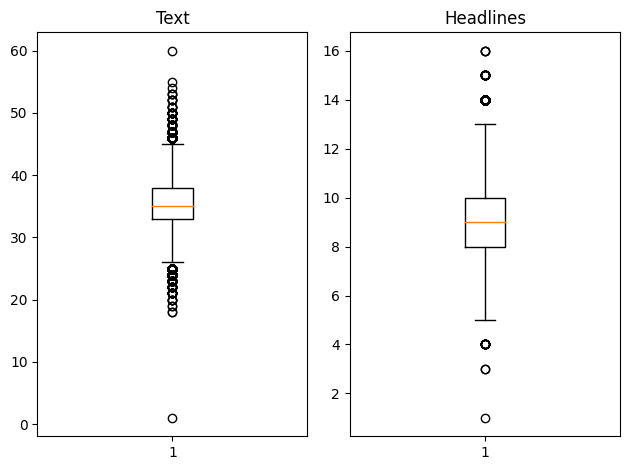

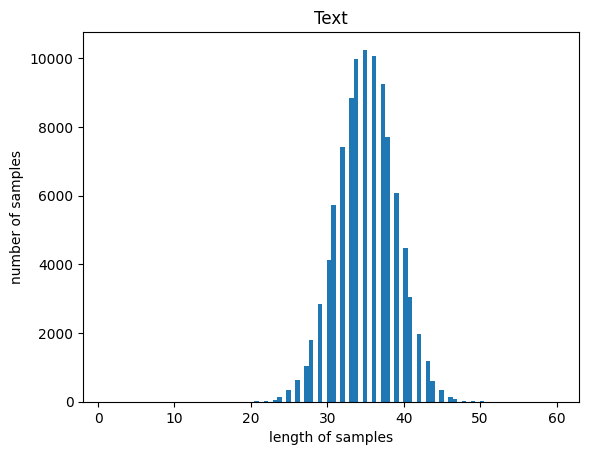

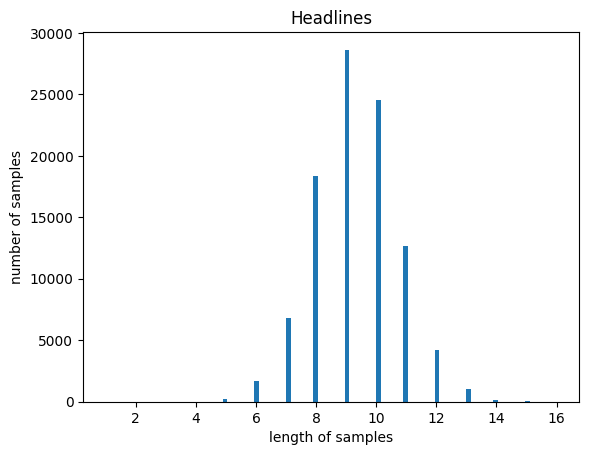

In [22]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
text_max_len = 50
headlines_max_len = 13

In [24]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [25]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9998576657177715
전체 샘플 중 길이가 13 이하인 샘플의 비율: 0.9981699877999186


In [26]:
processed_data = data[data['text'].apply(lambda x: len(x.split())) <= text_max_len]
processed_data = processed_data[processed_data['headlines'].apply(lambda x: len(x.split())) <= headlines_max_len]

print('전체 샘플수 :', (len(processed_data)))
print('전체 샘플수 :', (len(data)))

temp = data
data = processed_data

전체 샘플수 : 98166
전체 샘플수 : 98360


In [27]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['headlines'] = data['headlines'].apply(str)
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...


In [60]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [31]:
encoder_input

array(['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers',
       'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit',
       'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history',
       ...,
       'according reports new version science fiction film matrix development michael jordan reportedly play lead role film screenwrit

In [32]:
decoder_input

array(['sostoken upgrad learner switches to career in ml al with salary hike',
       'sostoken delhi techie wins free food from swiggy for one year on cred',
       'sostoken new zealand end rohit sharma led india match winning streak',
       ..., 'sostoken the matrix film to get reboot reports',
       'sostoken snoop dogg aims gun at clown dressed as trump in new video',
       'sostoken madhesi morcha withdraws support to nepalese government'],
      dtype=object)

In [33]:
decoder_target

array(['upgrad learner switches to career in ml al with salary hike eostoken',
       'delhi techie wins free food from swiggy for one year on cred eostoken',
       'new zealand end rohit sharma led india match winning streak eostoken',
       ..., 'the matrix film to get reboot reports eostoken',
       'snoop dogg aims gun at clown dressed as trump in new video eostoken',
       'madhesi morcha withdraws support to nepalese government eostoken'],
      dtype=object)

---

## 데이터셋 나누기

In [61]:
np.random.seed(seed=0)

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[11864 10272 55256 ... 42613 43567 68268]


In [62]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [63]:
n_of_val = int(len(encoder_input)*0.1)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 9816


In [64]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 88350
훈련 레이블의 개수 : 88350
테스트 데이터의 개수 : 9816
테스트 레이블의 개수 : 9816


---

## 단어 집합(vocabulary) 만들기 및 정수 인코딩

In [65]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [66]:
threshold = 14
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 73053
등장 빈도가 13번 이하인 희귀 단어의 수: 56764
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 16289
단어 집합에서 희귀 단어의 비율: 77.70248997303327
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.39781567117761


In [67]:
src_vocab = 16000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [68]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1359, 738, 2, 282, 189, 311, 1119, 86, 305, 2, 91, 2615, 5327, 241, 5272, 677, 88, 91, 146, 311, 1792, 2, 100, 374, 199, 186, 7, 218, 11, 7423, 30, 1353, 311, 3480, 606, 311, 101, 230, 76, 60], [5541, 89, 14696, 4148, 41, 139, 1244, 107, 6216, 10, 490, 1250, 39, 1976, 674, 1524, 1247, 3040, 1247, 101, 2506, 3278, 157, 4, 14696, 4021, 1082, 284, 2279], [161, 62, 44, 14, 808, 773, 1, 8, 574, 130, 1335, 2393, 21, 145, 2814, 619, 1731, 1671, 7332, 808, 4, 8, 589, 1836, 22, 3279, 3535, 224, 677, 549, 3459]]


In [69]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [70]:
threshold = 10
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31355
등장 빈도가 9번 이하인 희귀 단어의 수: 23150
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8205
단어 집합에서 희귀 단어의 비율: 73.83192473289746
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.561516625222806


In [71]:
tar_vocab = 8000
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 2155, 362, 8, 164, 3837, 3384, 597, 100, 909], [1, 682, 3, 49, 191, 171, 116, 1877], [1, 25, 271, 3, 269, 25, 766, 4, 4152], [1, 7318, 248, 220, 6327, 1180, 9, 437, 4, 1181], [1, 1255, 1264, 80, 44, 214, 2479, 2846, 76]]
target
decoder  [[2155, 362, 8, 164, 3837, 3384, 597, 100, 909, 2], [682, 3, 49, 191, 171, 116, 1877, 2], [25, 271, 3, 269, 25, 766, 4, 4152, 2], [7318, 248, 220, 6327, 1180, 9, 437, 4, 1181, 2], [1255, 1264, 80, 44, 214, 2479, 2846, 76, 2]]


In [72]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 88349
훈련 레이블의 개수 : 88349
테스트 데이터의 개수 : 9816
테스트 레이블의 개수 : 9816


---

## 패딩하기

In [73]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

---

# 모델 설계하기
---

## 인코더, 디코더

In [75]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

In [76]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [77]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      2048000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

---

## 어텐션 메커니즘

In [78]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      2048000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

---

# 모델 훈련하기

In [79]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
346/346 [==============================] - 92s 242ms/step - loss: 5.3817 - val_loss: 4.6472
Epoch 2/50
346/346 [==============================] - 173s 501ms/step - loss: 4.5117 - val_loss: 4.2832
Epoch 3/50
346/346 [==============================] - 186s 537ms/step - loss: 4.1466 - val_loss: 4.0321
Epoch 4/50
346/346 [==============================] - 169s 489ms/step - loss: 3.8895 - val_loss: 3.8511
Epoch 5/50
346/346 [==============================] - 212s 615ms/step - loss: 3.6907 - val_loss: 3.7295
Epoch 6/50
346/346 [==============================] - 212s 611ms/step - loss: 3.5261 - val_loss: 3.6304
Epoch 7/50
346/346 [==============================] - 185s 532ms/step - loss: 3.3901 - val_loss: 3.5435
Epoch 8/50
346/346 [==============================] - 196s 567ms/step - loss: 3.2702 - val_loss: 3.4707
Epoch 9/50
346/346 [==============================] - 212s 614ms/step - loss: 3.1712 - val_loss: 3.4381
Epoch 10/50
346/346 [==============================] - 258s 745ms

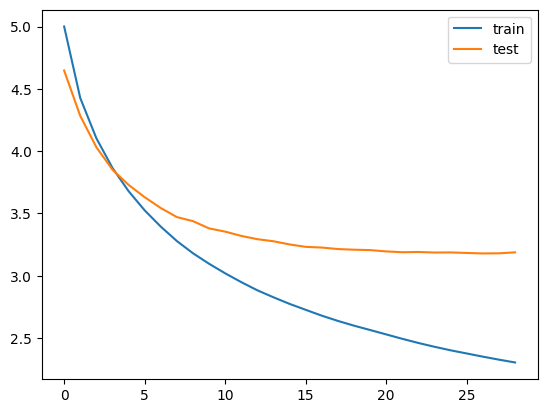

In [80]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 추가 학습

In [81]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
346/346 [==============================] - 111s 300ms/step - loss: 2.2871 - val_loss: 3.1973
Epoch 2/50
346/346 [==============================] - 166s 480ms/step - loss: 2.2436 - val_loss: 3.1851
Epoch 3/50
346/346 [==============================] - 208s 597ms/step - loss: 2.2162 - val_loss: 3.1961
Epoch 4/50
346/346 [==============================] - 240s 694ms/step - loss: 2.1922 - val_loss: 3.1845
Epoch 5/50
346/346 [==============================] - 164s 474ms/step - loss: 2.1733 - val_loss: 3.1867
Epoch 6/50
346/346 [==============================] - 155s 449ms/step - loss: 2.1522 - val_loss: 3.1877
Epoch 7/50
346/346 [==============================] - 135s 391ms/step - loss: 2.1358 - val_loss: 3.1911
Epoch 00007: early stopping


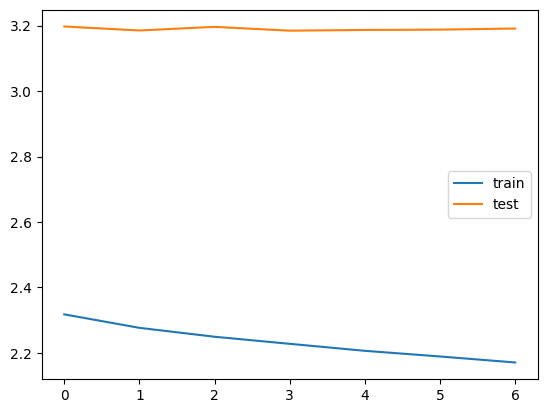

In [82]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 학습률 조정 ( 0.0005 ~ 0.0007 ) 후 재학습

In [105]:
import tensorflow as tf
import datetime

file_path='C:/Users/ligoan/OneDrive/바탕 화면/I/repository/quest/Exploration_quest/Quest02/best_model_learning_rate_adjust.keras'
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1),
    ModelCheckpoint(file_path,
                    save_best_only=True,
                    monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir)
]

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.0006), loss='sparse_categorical_crossentropy')

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=callbacks, epochs=50)

Epoch 1/50
346/346 [==============================] - 95s 257ms/step - loss: 1.9033 - val_loss: 3.1385
Epoch 2/50
346/346 [==============================] - 144s 417ms/step - loss: 1.8876 - val_loss: 3.1396
Epoch 3/50
346/346 [==============================] - 179s 518ms/step - loss: 1.8748 - val_loss: 3.1412
Epoch 00003: early stopping


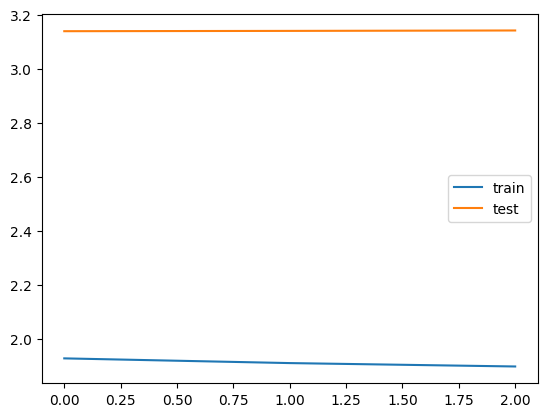

In [106]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 옵티마이저 조정(RMSProp -> Adam) 후 재학습

In [107]:
model = tf.keras.models.load_model('best_model_learning_rate_adjust.keras')

In [111]:
import tensorflow as tf

file_path='C:/Users/ligoan/OneDrive/바탕 화면/I/repository/quest/Exploration_quest/Quest02/best_model_change_optimizer_adam.keras'

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1),
    ModelCheckpoint(file_path,
                    save_best_only=True,
                    monitor='val_loss'),
]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=callbacks, epochs=50)

Epoch 1/50
346/346 [==============================] - 109s 295ms/step - loss: 1.9246 - val_loss: 3.1211
Epoch 2/50
346/346 [==============================] - 189s 548ms/step - loss: 1.8332 - val_loss: 3.1304
Epoch 3/50
346/346 [==============================] - 187s 541ms/step - loss: 1.7692 - val_loss: 3.1378
Epoch 00003: early stopping


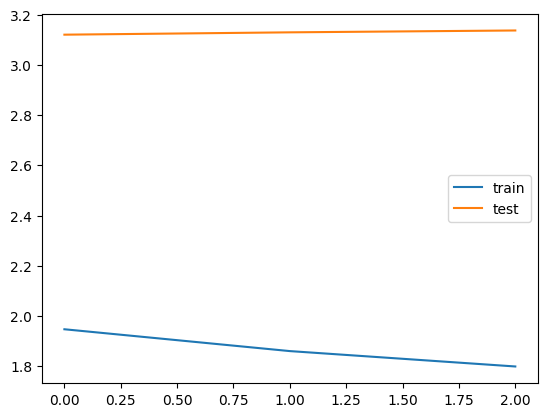

In [112]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 학습률 조정 ( 0.0005 0.0007 )

In [113]:
model = tf.keras.models.load_model('best_model_change_optimizer_adam.keras')

In [115]:
import tensorflow as tf

file_path='C:/Users/ligoan/OneDrive/바탕 화면/I/repository/quest/Exploration_quest/Quest02/best_model_change_optimizer_adam_lr_0.0005.keras'

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1),
    ModelCheckpoint(file_path,
                    save_best_only=True,
                    monitor='val_loss'),
]

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='sparse_categorical_crossentropy')

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=callbacks, epochs=50)

Epoch 1/50
346/346 [==============================] - 146s 396ms/step - loss: 1.8169 - val_loss: 3.1255
Epoch 2/50
346/346 [==============================] - 186s 539ms/step - loss: 1.7621 - val_loss: 3.1292
Epoch 3/50
346/346 [==============================] - 212s 611ms/step - loss: 1.7235 - val_loss: 3.1353
Epoch 00003: early stopping


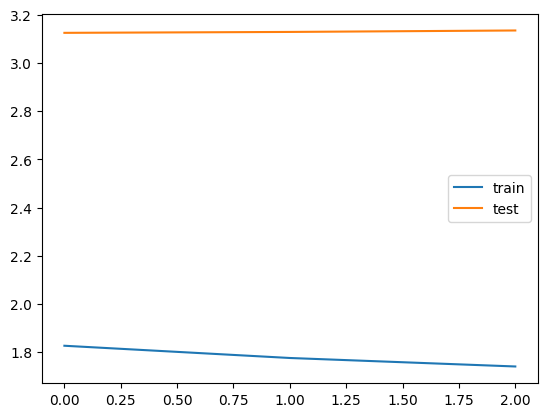

In [116]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [117]:
model = tf.keras.models.load_model('best_model_change_optimizer_adam.keras')

---

# 인퍼런스 모델 구현하기

In [118]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [119]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 테스트 단게의 디코더
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [120]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [121]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

---

## 모델 테스트

In [122]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + src_index_to_word[i]+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            sentence = sentence + tar_index_to_word[i] + ' '
    return sentence

In [123]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : sealed envelope used first harry potter movie bearing school witchcraft auctioned us made marble effect paper seemingly contains letters inside used scene wherein household letters informing harry acceptance 
실제 요약 : harry potter letter auctioned for lakh 
예측 요약 :  hyderabad school to be auctioned for


원문 : two brothers arrested dubai airport allegedly tried smuggle kg heroin hiding many capsules recovered charged possession smuggling drugs two suspected involved smuggling past well 
실제 요약 : brothers held with kg heroin in in dubai 
예측 요약 :  two held for smuggling drugs in mumbai airport


원문 : us senate confirmed three indian americans picked president donald trump key governmental posts three indian americans neil chatterjee vishal krishna chatterjee serve member federal energy regulatory commission confirmed intellectual property enforcement coordinator us ambassador peru respectively nn 
실제 요약 : us senate confirms three indian americans to key govt posts 
예측 요약 :  us state se

# 추출적 요약

In [124]:
import requests
from summa.summarizer import summarize

## summarize 사용

In [148]:
print('Headline:')
print(summarize(data['text'][0], ratio=0.5))

Headline:



In [149]:
print('Headline:')
print(summarize(data['text'][0], ratio=0.5, split=True))

Headline:
[]


In [150]:
print('Headline:')
print(summarize(data['text'][0], words=1000))

Headline:



## 텍스트 랭크(TextRank Based on Sentence Embedding)

### GloVe

In [3]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

---

#### 다운로드

In [ ]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [4]:
glove_dict = dict()
f = open('glove.6B.100d.txt', encoding="utf8") # 100차원의 GloVe 벡터를 사용

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    glove_dict[word] = word_vector_arr
f.close()

In [5]:
glove_dict['cat']

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

---

#### 문장 임베딩

In [6]:
# glove_dict에 존재하지 않는 단어가 문장에 존재할 경우에 대비
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

In [7]:
# 단어 벡터의 평균으로부터 문장 벡터 얻기
def calculate_sentence_vector(sentence):
  return sum([glove_dict.get(word, zero_vector) for word in sentence])/len(sentence)

In [8]:
eng_sent = ['I', 'am', 'a', 'student']
sentence_vector = calculate_sentence_vector(eng_sent)
print(len(sentence_vector))

100


In [9]:
kor_sent = ['전', '좋은', '학생', '입니다']
sentence_vector = calculate_sentence_vector(kor_sent)
print(sentence_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


---

#### 텍스트 요약

In [10]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [11]:
# nltk 제공 영어 불용어
stop_words = stopwords.words('english')

In [14]:
# 데이터 생성
df = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [15]:
# 중복 데이터 제거
df.drop_duplicates(subset=['text'], inplace=True)

In [16]:
df.head(10)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...


In [19]:
# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)

In [20]:
# headlines 문장 토큰화
df['sentences'] = df['text'].apply(sent_tokenize)

In [21]:
df.head(10)

,headlines,text,sentences
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...","[Saurav Kant, an alumnus of upGrad and IIIT-B'..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,[Kunal Shah's credit card bill payment platfor...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,[New Zealand defeated India by 8 wickets in th...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...","[With Aegon Life iTerm Insurance plan, custome..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,[Speaking about the sexual harassment allegati...
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...,[Pakistani singer Rahat Fateh Ali Khan has den...
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...,[India recorded their lowest ODI total in New ...
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...,[Weeks after ex-CBI Director Alok Verma told t...
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...,[Andhra Pradesh CM N Chandrababu Naidu has sai...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...,[Congress candidate Shafia Zubair won the Ramg...


#### 토큰화와 전처리 함수 정의

In [22]:
# 토큰화 함수
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]

In [23]:
df.dropna(inplace=True)

In [24]:
# 단어 토큰화
df['tokenized_sentences'] = df['sentences'].apply(tokenization)
df['tokenized_sentences'] = df['tokenized_sentences'].apply(preprocess_sentences)

In [25]:
df.head(10)

,headlines,text,sentences,tokenized_sentences
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...","[Saurav Kant, an alumnus of upGrad and IIIT-B'...","[[saurav, kant, alumnus, upgrad, iiitb, pg, pr..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,[Kunal Shah's credit card bill payment platfor...,"[[kunal, shah, credit, card, bill, payment, pl..."
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,[New Zealand defeated India by 8 wickets in th...,"[[new, zealand, defeated, india, wickets, four..."
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...","[With Aegon Life iTerm Insurance plan, custome...","[[aegon, life, iterm, insurance, plan, custome..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,[Speaking about the sexual harassment allegati...,"[[speaking, sexual, harassment, allegations, r..."
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...,[Pakistani singer Rahat Fateh Ali Khan has den...,"[[pakistani, singer, rahat, fateh, ali, khan, ..."
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...,[India recorded their lowest ODI total in New ...,"[[india, recorded, lowest, odi, total, new, ze..."
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...,[Weeks after ex-CBI Director Alok Verma told t...,"[[weeks, excbi, director, alok, verma, told, d..."
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...,[Andhra Pradesh CM N Chandrababu Naidu has sai...,"[[andhra, pradesh, cm, n, chandrababu, naidu, ..."
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...,[Congress candidate Shafia Zubair won the Ramg...,"[[congress, candidate, shafia, zubair, ramgarh..."


In [26]:
# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)

In [27]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

# 단어 벡터의 평균으로부터 문장 벡터 얻는 함수
def calculate_sentence_vector(sentence):
  if len(sentence) != 0:
    return sum([glove_dict.get(word, zero_vector) 
                  for word in sentence])/len(sentence)
  else:
    return zero_vector

# 각 문장에 대해서 문장 벡터 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) 
              for sentence in sentences]

In [28]:
df['SentenceEmbedding'] = df['tokenized_sentences'].apply(sentences_to_vectors)
df[['SentenceEmbedding']]

,SentenceEmbedding
0,"[[-0.03110142209027943, 0.2509987346435848, 0...."
1,"[[0.07118500330868889, 0.1200263500213623, 0.2..."
2,"[[-0.3938936829566956, 0.08775366445382436, 0...."
3,"[[-0.13275814748236112, 0.2197451437158244, 0...."
4,"[[0.1350858618638345, 0.11717160325497389, 0.0..."
...,...
98355,"[[-0.17640973329544068, -0.08033666635553043, ..."
98356,"[[-0.31426433, -0.4974924, 0.13351959, -0.3342..."
98357,"[[-0.11475078, 0.20882098, 0.37073195, -0.0543..."
98358,"[[0.08184077, -0.091733046, 0.38981992, -0.241..."


In [29]:
# 유사도(크기 == 문장 개수의 제곱) 행렬 생성
def similarity_matrix(sentence_embedding):
  sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
  for i in range(len(sentence_embedding)):
      for j in range(len(sentence_embedding)):
        sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
  return sim_mat

In [30]:
# 코사인 유사도 열 생성
df['SimMatrix'] = df['SentenceEmbedding'].apply(similarity_matrix)
df['SimMatrix']

0        [[1.0000000000000002, 0.8437472794731611, 0.78...
1        [[0.9999999999999999, 0.5244610885670492, 0.90...
2        [[1.0000000000000002, 0.9064620738749639, 0.90...
3        [[1.0000000000000002, 0.7802564345056789, 0.81...
4        [[1.0000000000000002, 0.8746701110513524, 0.73...
                               ...                        
98355    [[1.0, 0.796665638448078, 0.6237575858456107],...
98356    [[1.0, 0.578364543707745, 0.7477105533099697, ...
98357    [[1.000000238418579, 0.7564843893051147, 0.788...
98358    [[1.0, 0.8094996575434227, 0.7127675414085388]...
98359    [[1.0000000000000002, 0.9110210990375208], [0....
Name: SimMatrix, Length: 98360, dtype: object

In [31]:
print('두 번째 샘플의 문장 개수 :',len(df['tokenized_sentences'][1]))
print('두 번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :',np.shape(df['SentenceEmbedding'][1]))
print('두 번째 샘플의 유사도 행렬의 크기(shape) :',df['SimMatrix'][1].shape)

두 번째 샘플의 문장 개수 : 3
두 번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : (3, 100)
두 번째 샘플의 유사도 행렬의 크기(shape) : (3, 3)


In [32]:
# 그래프
def draw_graphs(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
  plt.show()

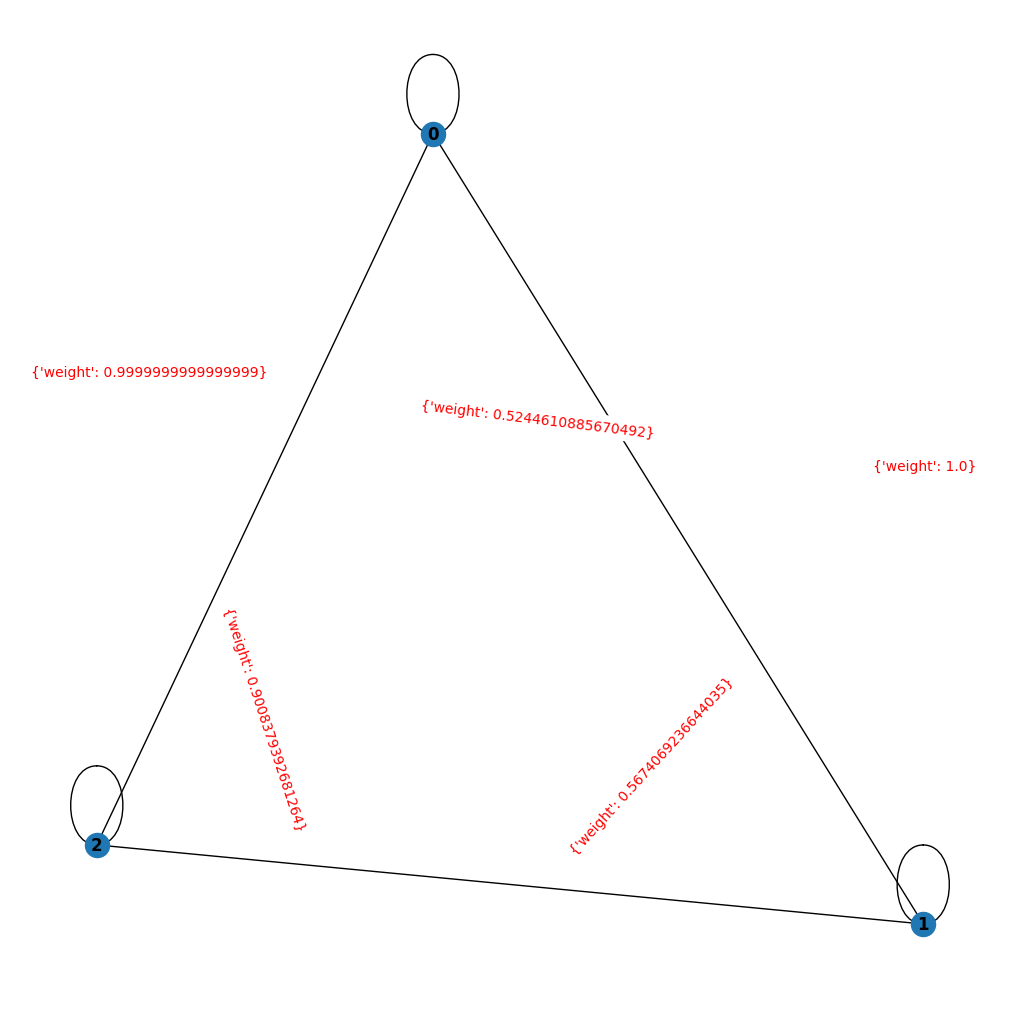

In [33]:
draw_graphs(df['SimMatrix'][1])

In [44]:
# 페이지 랭크 알고림 기반 문장 점수 산정
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

In [45]:
df.head(10)

,headlines,text,sentences,tokenized_sentences,SentenceEmbedding,SimMatrix
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...","[Saurav Kant, an alumnus of upGrad and IIIT-B'...","[[saurav, kant, alumnus, upgrad, iiitb, pg, pr...","[[-0.03110142209027943, 0.2509987346435848, 0....","[[1.0000000000000002, 0.8437472794731611, 0.78..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,[Kunal Shah's credit card bill payment platfor...,"[[kunal, shah, credit, card, bill, payment, pl...","[[0.07118500330868889, 0.1200263500213623, 0.2...","[[0.9999999999999999, 0.5244610885670492, 0.90..."
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,[New Zealand defeated India by 8 wickets in th...,"[[new, zealand, defeated, india, wickets, four...","[[-0.3938936829566956, 0.08775366445382436, 0....","[[1.0000000000000002, 0.9064620738749639, 0.90..."
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...","[With Aegon Life iTerm Insurance plan, custome...","[[aegon, life, iterm, insurance, plan, custome...","[[-0.13275814748236112, 0.2197451437158244, 0....","[[1.0000000000000002, 0.7802564345056789, 0.81..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,[Speaking about the sexual harassment allegati...,"[[speaking, sexual, harassment, allegations, r...","[[0.1350858618638345, 0.11717160325497389, 0.0...","[[1.0000000000000002, 0.8746701110513524, 0.73..."
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...,[Pakistani singer Rahat Fateh Ali Khan has den...,"[[pakistani, singer, rahat, fateh, ali, khan, ...","[[0.13778362, -0.33314914, 0.0022416227, -0.01...","[[0.9999998807907104, 0.7336646318435669, 0.62..."
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...,[India recorded their lowest ODI total in New ...,"[[india, recorded, lowest, odi, total, new, ze...","[[-0.26723042, 0.19925502, 0.65842146, 0.09804...","[[1.0000001192092896, 0.8258096473734144, 0.95..."
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...,[Weeks after ex-CBI Director Alok Verma told t...,"[[weeks, excbi, director, alok, verma, told, d...","[[-0.08084332045506347, -0.15078631636093964, ...","[[1.0, 0.891227904381532], [0.891227904381532,..."
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...,[Andhra Pradesh CM N Chandrababu Naidu has sai...,"[[andhra, pradesh, cm, n, chandrababu, naidu, ...","[[-0.6156039, -0.0150465425, 0.55135095, 0.169...","[[0.9999998211860657, 0.7671647667884827, 0.78..."
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...,[Congress candidate Shafia Zubair won the Ramg...,"[[congress, candidate, shafia, zubair, ramgarh...","[[-0.45722999473412834, 0.04787431073685487, 0...","[[0.9999999999999999, 0.8179704300314184, 0.85..."


In [46]:
df['score'] = df['SimMatrix'].apply(calculate_score)
df[['SimMatrix', 'score']]

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [47]:
import networkx as nx

def calculate_score(sim_matrix, alpha=0.85, max_iter=500, tol=1e-6):
    # Convert similarity matrix to a graph
    nx_graph = nx.from_numpy_array(sim_matrix)
    
    # Try to compute PageRank with increased iterations and a specified tolerance
    try:
        scores = nx.pagerank(nx_graph, alpha=alpha, max_iter=max_iter, tol=tol)
    except nx.PowerIterationFailedConvergence:
        print("PageRank failed to converge. Try adjusting alpha or max_iter.")
        scores = {i: 0 for i in range(len(sim_matrix))}  # Default to zero if failure
    
    return scores

df['score'] = df['SimMatrix'].apply(calculate_score)
df[['SimMatrix', 'score']]


PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank failed to converge. Try adjusting alpha or max_iter.
PageRank

,SimMatrix,score
0,"[[1.0000000000000002, 0.8437472794731611, 0.78...","{0: 0.3369241329963341, 1: 0.3346311297253937,..."
1,"[[0.9999999999999999, 0.5244610885670492, 0.90...","{0: 0.34437261094300664, 1: 0.3059427797319144..."
2,"[[1.0000000000000002, 0.9064620738749639, 0.90...","{0: 0.33430031392252924, 1: 0.3327397388457738..."
3,"[[1.0000000000000002, 0.7802564345056789, 0.81...","{0: 0.32473581176115723, 1: 0.3358684594852912..."
4,"[[1.0000000000000002, 0.8746701110513524, 0.73...","{0: 0.27071878516528236, 1: 0.2619623170477332..."
...,...,...
98355,"[[1.0, 0.796665638448078, 0.6237575858456107],...","{0: 0.33213242961789397, 1: 0.3438288706272035..."
98356,"[[1.0, 0.578364543707745, 0.7477105533099697, ...","{0: 0.26660090125314545, 1: 0.2253605764193263..."
98357,"[[1.000000238418579, 0.7564843893051147, 0.788...","{0: 0.2467302392525479, 1: 0.25020619859533194..."
98358,"[[1.0, 0.8094996575434227, 0.7127675414085388]...","{0: 0.34358751068430926, 1: 0.3336460856900828..."


In [48]:
df['score'][1]

{0: 0.34437261094300664, 1: 0.30594277973191447, 2: 0.3496846093250784}

In [49]:
# score 중 가장 높은 점수 3개 선택하여 text를 summary하는 함수
def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) 
                         for i,s in enumerate(sentences)), 
                                reverse=True)
    top_n_sentences = [sentence 
                        for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

In [51]:
df['summary'] = df.apply(lambda x: 
                            ranked_sentences(x.sentences, 
                            x.score), axis=1)

In [53]:
# 텍스트를 키로
df = df.set_index('text')

In [55]:
new_df = df[['headlines', 'summary']]

In [57]:
new_df.head(10)

,headlines,summary
text,,
"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.",Delhi techie wins free food from Swiggy for on...,Users get one CRED coin per rupee of bill paid...
"New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history.",New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.",Aegon life iTerm insurance plan helps customer...,"Also, customers have options to insure against..."
"Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment,"" she added. Hirani has been accused by an assistant who worked in 'Sanju'.","Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
"Pakistani singer Rahat Fateh Ali Khan has denied receiving any notice from the Enforcement Directorate over allegedly smuggling foreign currency out of India. ""It would have been better if the authorities would have served the notice first if any and then publicised this,"" reads a press release issued on behalf of Rahat. The statement further called the allegation ""bizarre"".",Rahat Fateh Ali Khan denies getting notice for...,"""It would have been better if the authorities ..."
"India recorded their lowest ODI total in New Zealand after getting all out for 92 runs in 30.5 overs in the fourth ODI at Hamilton on Thursday. Seven of India's batsmen were dismissed for single-digit scores, while their number ten batsman Yuzvendra Chahal top-scored with 18*(37). India's previous lowest ODI total in New Zealand was 108.","India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
"Weeks after ex-CBI Director Alok Verma told the Department of Personnel and Training to consider him retired, the Home Ministry asked him to join work on the last day of his fixed tenure as Director on Thursday. The ministry directed him to immediately join as DG, Fire Services, the post he was transferred to after his removal as CBI chief.",Govt directs Alok Verma to join work 1 day bef...,The ministry directed him to immediately join ...
"Andhra Pradesh CM N Chandrababu Naidu has said, ""When I met then US President Bill Clinton, I addressed him as Mr Clinton, not as 'sir'. (PM Narendra) Modi is my junior in politics...I addressed him as sir 10 times."" ""I did this...to satisfy his ego in the hope that he w

### 결과 비교

In [59]:
new_df[['headlines', 'summary']]

,headlines,summary
text,,
"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.",Delhi techie wins free food from Swiggy for on...,Users get one CRED coin per rupee of bill paid...
"New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history.",New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.",Aegon life iTerm insurance plan helps customer...,"Also, customers have options to insure against..."
"Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment,"" she added. Hirani has been accused by an assistant who worked in 'Sanju'.","Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
"A CRPF jawan was on Tuesday axed to death with sharp-edged weapons by Maoists at a local village fair in Chhattisgarh's insurgency-hit Bijapur district. As per preliminary information, Maoists attacked the jawan while he had gone to visit the fair along with his family, a police official said. A combing operation was launched to nab the assailants, he added.",CRPF jawan axed to death by Maoists in Chhatti...,"As per preliminary information, Maoists attack..."
"'Uff Yeh', the first song from the Sonakshi Sinha starrer upcoming drama film 'Noor' has been released. The song has been composed by Amaal Mallik with vocals by Armaan Malik and lyrics by Manoj Muntashir. Sonakshi will be seen portraying a Pakistani journalist-writer in the film. Directed by Sunhil Sippy, the film is scheduled to release on April 21.",First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
"According to reports, a new version of the 1999 science fiction film 'The Matrix' is in development. Michael B Jordan will reportedly play the lead role in the film. Screenwriter Zak Penn is in talks to write the script of the film, reports added. Actor Keanu Reeves starred in the original film, which was followed by two sequels.",'The Matrix' film to get a reboot: Reports,Screenwriter Zak Penn is in talks to write the...
